In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
path = '/content/drive/My Drive/STAT457'
os.chdir(path)
os.listdir()

['data',
 'csvData.csv',
 'tfidf.csv',
 'data.ipynb',
 'full_tfidf.ipynb',
 'Project2',
 'full_bert.ipynb',
 'rf.csv',
 'STAT457 Project2 Report.gdoc',
 '457Project2.ipynb']

In [3]:
# loading the required packages
import copy
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from __future__ import absolute_import, division, print_function, unicode_literals
# from keras.utils import to_categorical
from keras.utils import np_utils    # np_utils.to_categorical()
import collections
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import re
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import  f1_score
from sklearn.metrics import confusion_matrix
from gensim.models import KeyedVectors
%matplotlib inline
print("finish loading")

finish loading


In [4]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from xgboost.sklearn import XGBClassifier
import xgboost
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

In [5]:
import nltk # downloading required packages from nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [6]:
xy_train_df = pd.read_csv("data/W22_P2_train.csv",encoding='gb18030')

In [7]:
xy_train_df['length'] = xy_train_df.apply(lambda x: len(x.description), axis=1) # calculate each review length
xy_train_df = xy_train_df.sort_values('length') # sort by length, in accsending order
xy_train_df # display training dataset

,id,genre,description,length
8947,7616,short,Documental sobre canciones de Enric Barbat.,44
9484,2100,short,Documental sobre la elecci璐竛 de Miss Europa,44
9385,6003,short,Documental sobre la evoluci璐竛 de la Marina Es...,53
4388,7740,short,Documental rodado sobre fotograf閾哸s fijas de ...,53
7725,9106,short,Documental sobre las aguas del Oc鑼卆no 鑴dico ...,68
...,...,...,...,...
4268,478,drama,"Set in modern day India, Swades is a film tha...",4845
1106,6932,documentary,Meeting David Wilson is a feature length docu...,5073
6008,2752,drama,Before marriage Mr. and Mrs. Wiggs were emplo...,6936
3195,1314,drama,"Genua, 3rd October 1985. Together with over 5...",7920


In [8]:
xy_train_df.info() # get the basic information of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 8947 to 4744
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9998 non-null   int64 
 1   genre        9998 non-null   object
 2   description  9998 non-null   object
 3   length       9998 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 390.5+ KB


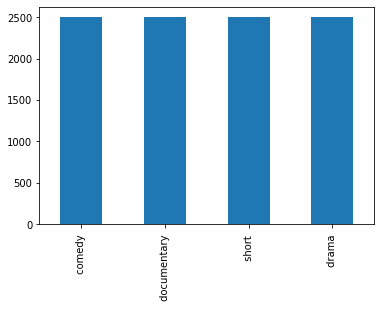

In [9]:
xy_train_df["genre"].value_counts().plot.bar() # visualize the rating distribution

In [10]:
review_list = [] # review list for this whole dataset
for i in range(len(xy_train_df.description)):
    review_list += xy_train_df.description[i]

In [11]:
special_char = ' '
for char in set(' '.join(review_list)):
    if re.findall('[^A-Za-z]', char): # use regex to find special characters
        special_char += char
sorted(special_char)

['\n',
 ' ',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '~',
 '╄',
 '〆',
 '゜',
 'ゞ',
 'ヽ',
 'ヾ',
 '仹',
 '伜',
 '劷',
 '匓',
 '卆',
 '卋',
 '卌',
 '卍',
 '卐',
 '協',
 '単',
 '卙',
 '卛',
 '卝',
 '卨',
 '卪',
 '卬',
 '卭',
 '卲',
 '卶',
 '卹',
 '卻',
 '卼',
 '卽',
 '卾',
 '厁',
 '厇',
 '哸',
 '哹',
 '哻',
 '哾',
 '唂',
 '唃',
 '唊',
 '唋',
 '唌',
 '唍',
 '唎',
 '唒',
 '唕',
 '唖',
 '唗',
 '啴',
 '坔',
 '坙',
 '坢',
 '坣',
 '坱',
 '塨',
 '塩',
 '塭',
 '塯',
 '塰',
 '塱',
 '塴',
 '塵',
 '塶',
 '塸',
 '塺',
 '塻',
 '塼',
 '墔',
 '墷',
 '墸',
 '墿',
 '姊',
 '姣',
 '娌',
 '媗',
 '媘',
 '媙',
 '媡',
 '媣',
 '宮',
 '宺',
 '峴',
 '扙',
 '抍',
 '抔',
 '抧',
 '抰',
 '揚',
 '揵',
 '搊',
 '搑',
 '搒',
 '撹',
 '昰',
 '昹',
 '時',
 '晅',
 '棰',
 '楄',
 '歜',
 '歞',
 '歠',
 '歨',
 '歬',
 '歭',
 '歮',
 '歯',
 '歱',
 '歳',
 '歴',
 '歵',
 '歸',
 '歾',
 '氳',
 '沴',
 '沶',
 '況',
 '洸',
 '涔',
 '渘',
 '澧',
 '濯',
 '灇',
 '烝',
 '

In [12]:
# text preprocessing and normalization:
# replace the special characters with the space,
# change all letters to lower case, change the verb tense to default case
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None


def clean(df):
    descriptions = []
    for description in df['description']:       
        #remove special characters
        clean_text = re.sub("[^a-zA-Z]"," ", description)
        #tokenize the sentences, change to lower case
        words = word_tokenize(clean_text.lower())

        tagged_sent = pos_tag(words)
        #lemmatize each word
        lemmatizer = WordNetLemmatizer()
        lemmas_sent = []
        for tag in tagged_sent:
            wordnet_pos = get_wordnet_pos(tag[1]) or wordnet.NOUN
            lemmas_sent.append(lemmatizer.lemmatize(tag[0], pos=wordnet_pos))
        descriptions.append(' '.join(lemmas_sent))
    return descriptions

In [13]:
train_clean_sentence = clean(xy_train_df)
print(len(train_clean_sentence))

9998


In [14]:
# visualize the change between the original sentence and cleaned sentence
print(xy_train_df.iloc[1]["description"])
print(train_clean_sentence[1])

 Documental sobre la elecci璐竛 de Miss Europa
documental sobre la elecci de miss europa


In [15]:
train_clean_sentence[:10] # visualize the cleaned version

['documental sobre canciones de enric barbat',
 'documental sobre la elecci de miss europa',
 'documental sobre la evoluci de la marina espa la',
 'documental rodado sobre fotograf s fijas de venecia',
 'documental sobre la aguas del oc no dico y la isla de mauricio',
 'a journalist find he can see ghost after be strike by lightning',
 'four friend learn about animal farming on an unforgettable road trip',
 'documental sobre el valle de ar y su geograf muestra el nacimiento del r garona',
 'a group of friend try to keep in touch after high school despite their various path',
 'mac a grizzled war vet have his world turn upside down when he save a teenage runaway']

In [16]:
def replace(df, new): # create a new dataset with cleaned "review" column
  df_temp = copy.deepcopy(df)
  df_temp["description"] = new
  return df_temp

In [17]:
xy_train_new = replace(xy_train_df, train_clean_sentence)
xy_train_new.head()

,id,genre,description,length
8947,7616,short,documental sobre canciones de enric barbat,44
9484,2100,short,documental sobre la elecci de miss europa,44
9385,6003,short,documental sobre la evoluci de la marina espa la,53
4388,7740,short,documental rodado sobre fotograf s fijas de ve...,53
7725,9106,short,documental sobre la aguas del oc no dico y la ...,68


In [18]:
def parseWord(df, classes): # displaying the most frequent words appear in both sentences
    rslt = []
    for re in df[df["genre"] == classes]["description"]: # add the words to the list
        rslt += re
    text = "".join(rslt)
    wordCloud = WordCloud(background_color = "white", max_words = 60, width = 1000, height = 500).generate(text) # generate a word cloud based on the text
    plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word cloud for: " + str(classes))
    plt.show()

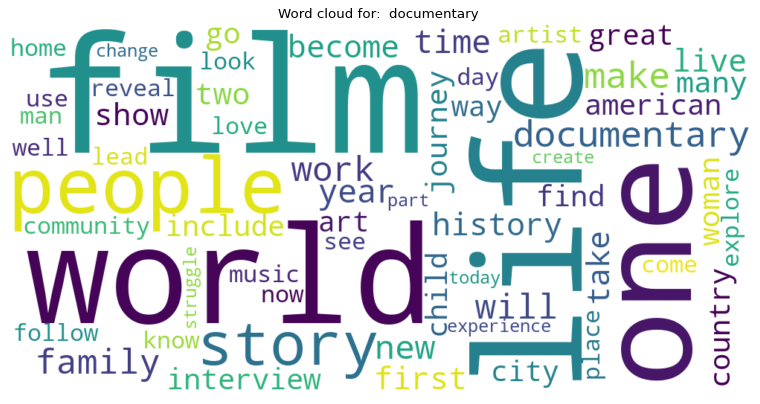

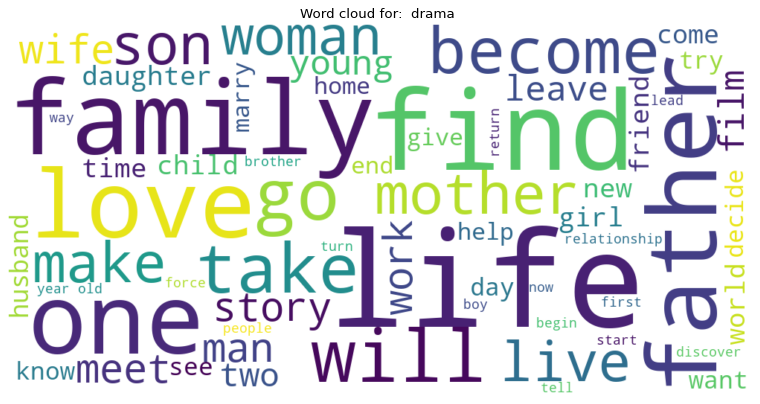

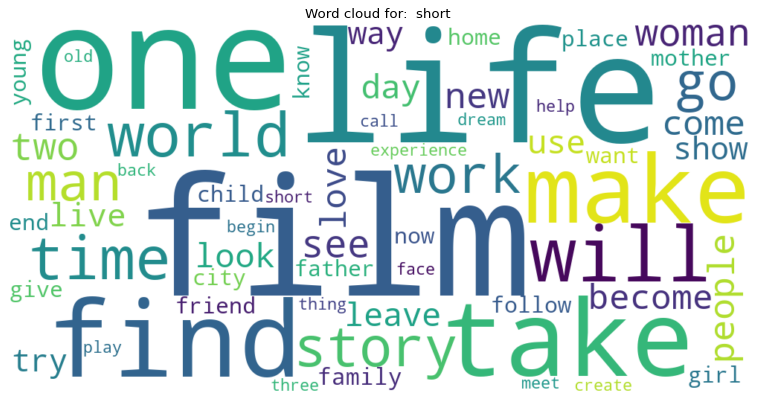

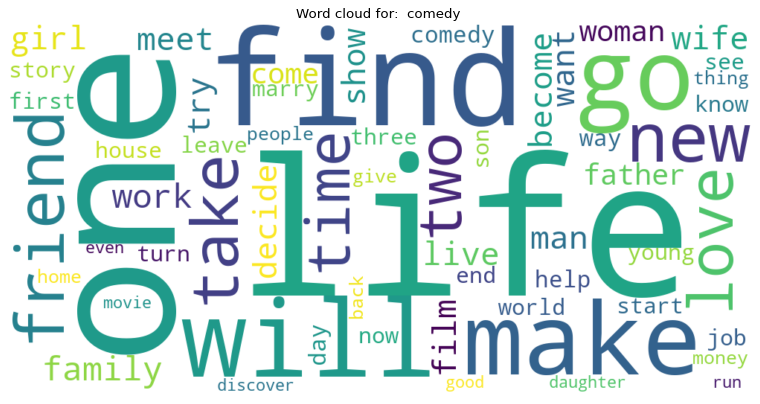

In [19]:
parseWord(xy_train_new, " documentary ")
parseWord(xy_train_new, " drama ")
parseWord(xy_train_new, " short ")
parseWord(xy_train_new, " comedy ")

In [20]:
# https://zhuanlan.zhihu.com/p/59473719
vectorized = TfidfVectorizer(stop_words = "english", max_df = 0.85, min_df = 2, binary = True)

In [21]:
train_vect = vectorized.fit_transform(xy_train_new["description"].values) # transfer to numeri value

In [22]:
label_encoder = LabelEncoder()
train_label = label_encoder.fit_transform(xy_train_new["genre"].values) # change from string to numeric label value
train_label.shape

(9998,)

In [23]:
x_train, x_valid, y_train, y_valid = train_test_split(train_vect, train_label, test_size = 0.2, random_state = 0)

In [24]:
x_train

<7998x18514 sparse matrix of type '<class 'numpy.float64'>'
	with 319891 stored elements in Compressed Sparse Row format>

In [25]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(100) # reduce dimension
svd.fit_transform(x_train)
svd.fit_transform(x_valid)
svd.fit_transform(train_vect)
# svd.transform(x_test_svd)

array([[ 1.96335027e-04,  5.52522049e-05,  1.53347588e-03, ...,
        -2.74006442e-02,  1.47878587e-02,  1.67051255e-02],
       [ 1.27013564e-02, -4.46770275e-03,  1.45863769e-02, ...,
        -2.41048878e-02,  2.07889609e-02,  2.13178981e-02],
       [ 5.65572587e-03,  2.40815995e-03,  7.51798915e-03, ...,
        -2.37131767e-02,  1.83751668e-02,  2.09532439e-02],
       ...,
       [ 2.82089461e-01, -1.22406399e-01,  5.44379526e-03, ...,
        -1.37458945e-02,  3.15712642e-02, -3.19858650e-02],
       [ 2.35333979e-01, -5.77164936e-02, -2.66687314e-02, ...,
        -2.87258400e-03, -1.56073426e-02, -1.18105443e-02],
       [ 2.23246526e-01,  1.18114442e-02, -4.69550563e-03, ...,
         2.66238069e-02, -4.83901607e-02, -4.11032847e-02]])

Test data

In [26]:
# prepare test data
x_test_df = pd.read_csv('data/W22_P2_test.csv', encoding='gb18030')
# x_test_df # display the test dataset

In [27]:
test_clean_sentence = clean(x_test_df)
test_cleaned= replace(x_test_df, test_clean_sentence)
test_vect = vectorized.transform(test_cleaned["description"].values)
test_vect

<6000x18514 sparse matrix of type '<class 'numpy.float64'>'
	with 234180 stored elements in Compressed Sparse Row format>

In [28]:
svd.transform(test_vect)

array([[ 0.08497384,  0.02472777,  0.01368312, ..., -0.00133704,
         0.00369874, -0.01374032],
       [ 0.15657058,  0.03911399, -0.00052681, ...,  0.01460006,
        -0.00118258,  0.03545277],
       [ 0.09624718,  0.00625801, -0.06460421, ..., -0.01319243,
         0.02577257, -0.00784279],
       ...,
       [ 0.08175661,  0.07975955,  0.03364431, ...,  0.03293025,
         0.03281391, -0.00521815],
       [ 0.01006537,  0.00937557,  0.00636507, ...,  0.00435687,
        -0.00422363, -0.00544526],
       [ 0.1101574 , -0.06225033,  0.06702005, ..., -0.01459665,
        -0.03709164,  0.02921765]])

## **Model**

In [29]:
def print_results(results): # function for print hyperparameter value and model accuracy
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

**Naive Bayes**

In [102]:
# Naive Bayes
nb = naive_bayes.MultinomialNB()
parameters = {
    "alpha" : [0.01, 0.1, 0.3, 0.5, 0.7, 1]
}
cv = GridSearchCV(nb, parameters, n_jobs = -1)
cv.fit(x_train, y_train)

print_results(cv)
cv.best_estimator_ #get best estimator

BEST PARAMS: {'alpha': 0.5}

0.569 (+/-0.02) for {'alpha': 0.01}
0.611 (+/-0.021) for {'alpha': 0.1}
0.628 (+/-0.027) for {'alpha': 0.3}
0.628 (+/-0.023) for {'alpha': 0.5}
0.627 (+/-0.026) for {'alpha': 0.7}
0.626 (+/-0.025) for {'alpha': 1}


MultinomialNB(alpha=0.5)

In [45]:
nb = naive_bayes.MultinomialNB(alpha = 0.5)
nb.fit(x_train, y_train)
nb.score(x_valid, y_valid)
# 0.639

0.639

In [46]:
nb.fit(train_vect, train_label)
y_predicted = nb.predict(test_vect)
y_predicted = label_encoder.inverse_transform(y_predicted)

In [49]:
y_predicted[:20]

array([' comedy ', ' documentary ', ' drama ', ' comedy ', ' drama ',
       ' comedy ', ' documentary ', ' documentary ', ' drama ',
       ' documentary ', ' comedy ', ' drama ', ' comedy ',
       ' documentary ', ' comedy ', ' documentary ', ' drama ', ' drama ',
       ' documentary ', ' drama '], dtype=object)

**Logistic Regression**

In [55]:
# Logistic Regression
lr = LogisticRegression() # initialize model
parameters = { # hyperparameter grid
    'C': [0.01, 0.1, 1, 10, 100, 200],
    'penalty': ['11', 'l2']
}
cv = GridSearchCV(lr, parameters, n_jobs = -1) # will use default 3-fold cross validation
cv.fit(x_train, y_train)

print_results(cv)
cv.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    % (all_penalties, penalty)
ValueError:

BEST PARAMS: {'C': 1, 'penalty': 'l2'}

nan (+/-nan) for {'C': 0.01, 'penalty': '11'}
0.61 (+/-0.029) for {'C': 0.01, 'penalty': 'l2'}
nan (+/-nan) for {'C': 0.1, 'penalty': '11'}
0.633 (+/-0.025) for {'C': 0.1, 'penalty': 'l2'}
nan (+/-nan) for {'C': 1, 'penalty': '11'}
0.641 (+/-0.03) for {'C': 1, 'penalty': 'l2'}
nan (+/-nan) for {'C': 10, 'penalty': '11'}
0.625 (+/-0.026) for {'C': 10, 'penalty': 'l2'}
nan (+/-nan) for {'C': 100, 'penalty': '11'}
0.615 (+/-0.026) for {'C': 100, 'penalty': 'l2'}
nan (+/-nan) for {'C': 200, 'penalty': '11'}
0.614 (+/-0.025) for {'C': 200, 'penalty': 'l2'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=1)

In [58]:
logreg1 = LogisticRegression(C=1, penalty = 'l2', dual=False,solver='lbfgs', max_iter=1000)
logreg1.fit(x_train , y_train)
logreg1.score(x_valid, y_valid)

0.645

In [57]:
logreg2 = LogisticRegression(C=1, penalty = 'l2', dual=False, solver='lbfgs', max_iter=1000)
logreg2.fit(train_vect, train_label)
y_predicted = logreg1.predict(test_vect) # predict value
y_predicted = label_encoder.inverse_transform(y_predicted)

In [59]:
y_predicted

array([' comedy ', ' documentary ', ' documentary ', ..., ' documentary ',
       ' short ', ' comedy '], dtype=object)

**Random Forest**

In [64]:
rf = RandomForestClassifier(n_estimators = 700)
parameters = {
    'max_depth': [10, 30, 50],
    'min_samples_split': [10, 30, 50],
    'max_features': [40, 50, 60],
    'min_samples_leaf': [5, 10, 20]
}

rf_cv = GridSearchCV(rf, parameters, verbose = 1, n_jobs = -1)
rf_cv.fit(x_train, y_train)

print_results(rf_cv)
# BEST PARAMS: {'max_depth': 50, 'max_features': 40, 'min_samples_leaf': 5, 'min_samples_split': 10}
# new BEST PARAMS: {'max_depth': 30, 'max_features': 40, 'min_samples_leaf': 5, 'min_samples_split': 50}

Fitting 5 folds for each of 81 candidates, totalling 405 fits
BEST PARAMS: {'max_depth': 30, 'max_features': 40, 'min_samples_leaf': 5, 'min_samples_split': 50}

0.601 (+/-0.015) for {'max_depth': 10, 'max_features': 40, 'min_samples_leaf': 5, 'min_samples_split': 10}
0.6 (+/-0.017) for {'max_depth': 10, 'max_features': 40, 'min_samples_leaf': 5, 'min_samples_split': 30}
0.602 (+/-0.022) for {'max_depth': 10, 'max_features': 40, 'min_samples_leaf': 5, 'min_samples_split': 50}
0.6 (+/-0.024) for {'max_depth': 10, 'max_features': 40, 'min_samples_leaf': 10, 'min_samples_split': 10}
0.597 (+/-0.017) for {'max_depth': 10, 'max_features': 40, 'min_samples_leaf': 10, 'min_samples_split': 30}
0.594 (+/-0.02) for {'max_depth': 10, 'max_features': 40, 'min_samples_leaf': 10, 'min_samples_split': 50}
0.592 (+/-0.02) for {'max_depth': 10, 'max_features': 40, 'min_samples_leaf': 20, 'min_samples_split': 10}
0.592 (+/-0.022) for {'max_depth': 10, 'max_features': 40, 'min_samples_leaf': 20, 'min_sam

In [65]:
rf = RandomForestClassifier(max_features = 40, min_samples_leaf = 5, min_samples_split = 50, n_estimators = 700, max_depth = 30)
rf.fit(x_train, y_train)
rf.score(x_valid_scale, y_valid)

0.6225

In [66]:
rf = RandomForestClassifier(max_features = 40, min_samples_leaf = 5, min_samples_split = 50, n_estimators = 700, max_depth = 30)
rf.fit(train_vect, train_label)
y_predicted = rf.predict(test_vect)
y_predicted = label_encoder.inverse_transform(y_predicted)

**MLP**

In [30]:
scale = StandardScaler(with_mean = False)
x_train_scale = scale.fit_transform(x_train) # standardize
x_valid_scale = scale.fit_transform(x_valid)
full_scale = scale.fit_transform(train_vect)
test_vect_scale = scale.transform(test_vect)

In [34]:
mlp = MLPClassifier() # initialize model
parameters = {
    'hidden_layer_sizes': [(64,4)], # hyperparameter tuning using GridSearch
    'activation': ['logistic'],
    'learning_rate': ['constant']
}
mlp_cv = GridSearchCV(mlp, parameters, verbose = 1, n_jobs = -1)
mlp_cv.fit(x_train_scale, y_train)

print_results(mlp_cv)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
BEST PARAMS: {'activation': 'logistic', 'hidden_layer_sizes': (64, 4), 'learning_rate': 'constant'}

0.474 (+/-0.072) for {'activation': 'relu', 'hidden_layer_sizes': (64, 4), 'learning_rate': 'constant'}
0.503 (+/-0.031) for {'activation': 'relu', 'hidden_layer_sizes': (64, 4), 'learning_rate': 'invscaling'}
0.496 (+/-0.047) for {'activation': 'relu', 'hidden_layer_sizes': (64, 4), 'learning_rate': 'adaptive'}
0.504 (+/-0.058) for {'activation': 'tanh', 'hidden_layer_sizes': (64, 4), 'learning_rate': 'constant'}
0.524 (+/-0.015) for {'activation': 'tanh', 'hidden_layer_sizes': (64, 4), 'learning_rate': 'invscaling'}
0.524 (+/-0.023) for {'activation': 'tanh', 'hidden_layer_sizes': (64, 4), 'learning_rate': 'adaptive'}
0.537 (+/-0.02) for {'activation': 'logistic', 'hidden_layer_sizes': (64, 4), 'learning_rate': 'constant'}
0.531 (+/-0.04) for {'activation': 'logistic', 'hidden_layer_sizes': (64, 4), 'learning_rate': 'invscali

In [41]:
mlp = MLPClassifier(hidden_layer_sizes = (64,4), activation = 'logistic', learning_rate = 'constant')
mlp_model = OneVsRestClassifier(mlp, n_jobs = -1)
mlp_model.fit(x_train_scale, y_train)
mlp_model.score(x_valid_scale, y_valid)
# 64,4: 0.567

0.567

In [43]:
mlp = MLPClassifier(hidden_layer_sizes = (64,4), activation = 'logistic', learning_rate = 'constant')
mlp_model = OneVsRestClassifier(mlp, n_jobs = -1)
mlp_model.fit(full_scale, train_label)
y_predicted = mlp_model.predict(test_vect_scale)
y_predicted = label_encoder.inverse_transform(y_predicted)

Write Result to File

In [44]:
y_predicted

array([' comedy ', ' documentary ', ' documentary ', ..., ' documentary ',
       ' drama ', ' drama '], dtype=object)

In [45]:
# write prediction to file

test_id = x_test_df[["id"]]
test_id = [int(test_id.loc[i]) for i in range(len(test_id))]

In [46]:
import csv
csvFile = open("NN.csv", "w") 
writer = csv.writer(csvFile) 
#先写入columns_name
writer.writerow(["id", "genre"])
for i in range(len(y_predicted)):
    writer.writerow([test_id[i], y_predicted[i]])
csvFile.close()

**XGB** (crushed)

In [ ]:
xgb = XGBClassifier(subsample = 0.7, gamma = 7)
parameters = {
    'eta': [0.01, 0.1],
    'max_depth': [9, 12]
}
xgb_cv = GridSearchCV(xgb, parameters, verbose = 2, n_jobs = -1)
xgb_cv.fit(x_train, y_train)

print_results(xgb_cv)

In [ ]:
xgb = XGBClassifier(eta = , max_depth = , n_estimators = , subsample = 0.7, gamma = 7)
xgb.fit(x_train, y_train)
xgb.score(x_valid_scale, y_valid)

In [ ]:
xgb = XGBClassifier(eta = , max_depth = , n_estimators = , subsample = 0.7, gamma = 7)
xgb.fit(full_scale, train_label)
y_predicted = linearsvm.predict(test_vect_scale)
y_predicted = label_encoder.inverse_transform(y_predicted)